In [336]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import math
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [337]:
df2_clean = pd.read_csv('//Users/sarahrestrepo/Desktop/Mid-bootcamp-project-2023/Python_files/Mid_project.csv')

In [338]:
df2_clean.head()

,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [339]:
df2_clean = df2_clean.drop(['Unnamed: 0'], axis = 1)

In [340]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21596 non-null  int64  
 1   bathrooms      21596 non-null  float64
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  int64  
 6   view           21596 non-null  int64  
 7   condition      21596 non-null  int64  
 8   grade          21596 non-null  int64  
 9   sqft_above     21596 non-null  int64  
 10  sqft_basement  21596 non-null  int64  
 11  yr_built       21596 non-null  int64  
 12  yr_renovated   21596 non-null  int64  
 13  zipcode        21596 non-null  int64  
 14  lat            21596 non-null  float64
 15  long           21596 non-null  float64
 16  sqft_living15  21596 non-null  int64  
 17  sqft_lot15     21596 non-null  int64  
 18  price 

In [341]:
for item in ['condition', 'waterfront','view','grade', 'zipcode']:
    df2_clean[item] = df2_clean[item].astype(np.object)

In [342]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21596 non-null  int64  
 1   bathrooms      21596 non-null  float64
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  object 
 6   view           21596 non-null  object 
 7   condition      21596 non-null  object 
 8   grade          21596 non-null  object 
 9   sqft_above     21596 non-null  int64  
 10  sqft_basement  21596 non-null  int64  
 11  yr_built       21596 non-null  int64  
 12  yr_renovated   21596 non-null  int64  
 13  zipcode        21596 non-null  object 
 14  lat            21596 non-null  float64
 15  long           21596 non-null  float64
 16  sqft_living15  21596 non-null  int64  
 17  sqft_lot15     21596 non-null  int64  
 18  price 

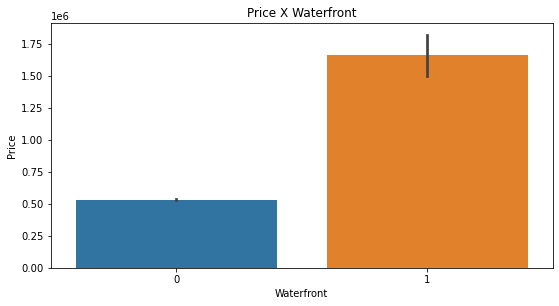

In [343]:
ax = sns.barplot(x=df2_clean.waterfront, y=df2_clean.price)
ax.figure.set_size_inches(9,4.5)
ax.set(title='Price X Waterfront', xlabel='Waterfront', ylabel='Price')
plt.show()

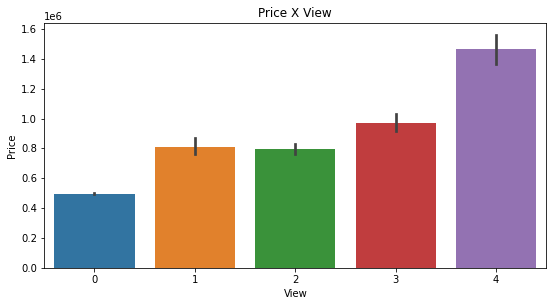

In [344]:
ax = sns.barplot(x=df2_clean.view, y=df2_clean.price)
ax.figure.set_size_inches(9,4.5)
ax.set(title='Price X View', xlabel='View', ylabel='Price')
plt.show()

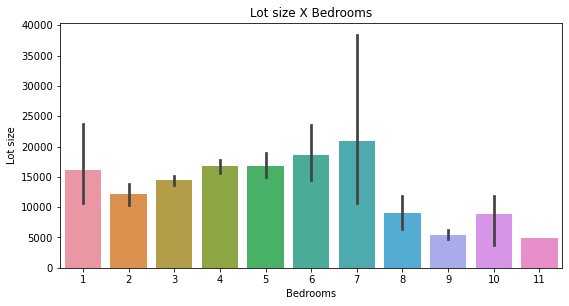

In [345]:
ax = sns.barplot(x=df2_clean.bedrooms, y=df2_clean.sqft_lot)
ax.figure.set_size_inches(9,4.5)
ax.set(title='Lot size X Bedrooms', xlabel='Bedrooms', ylabel='Lot size')
plt.show()

In [346]:
df2_clean = df2_clean.reset_index(drop=True)

In [347]:
numericals = df2_clean.select_dtypes(np.number)
categoricals = df2_clean.select_dtypes(np.object)

bedrooms


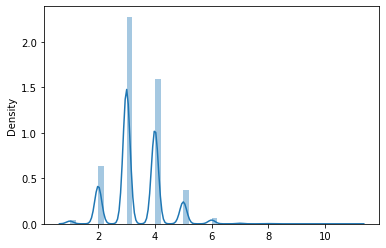

bathrooms


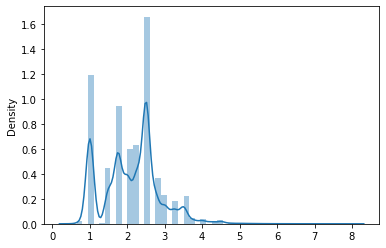

sqft_living


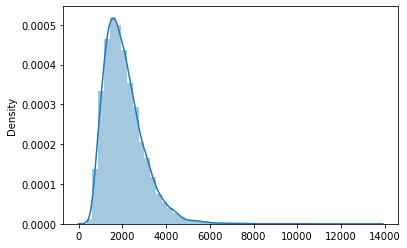

sqft_lot


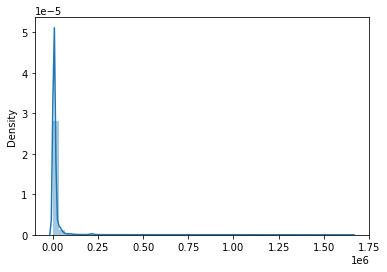

floors


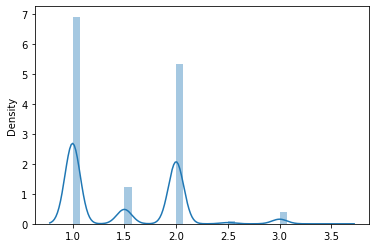

sqft_above


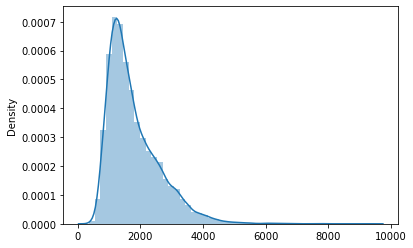

sqft_basement


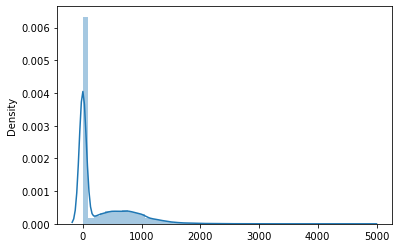

yr_built


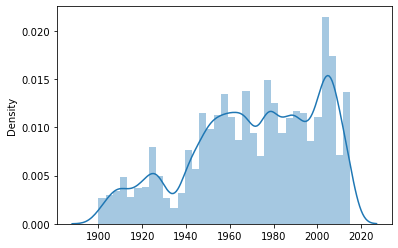

yr_renovated


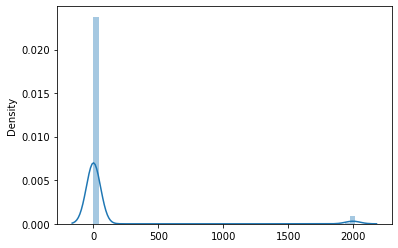

lat


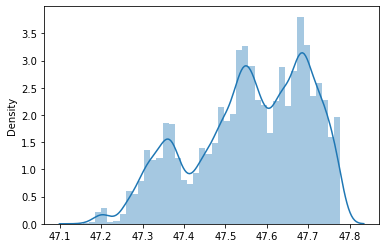

long


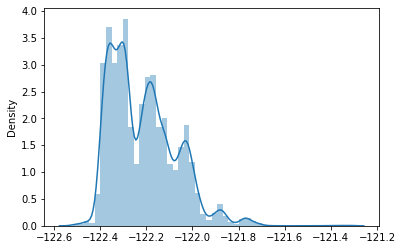

sqft_living15


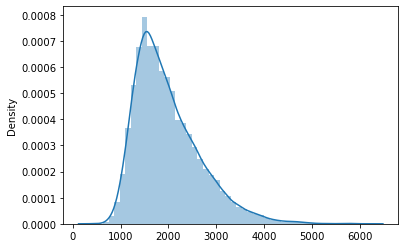

sqft_lot15


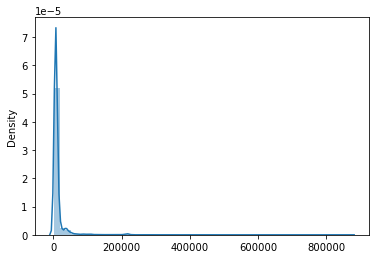

price


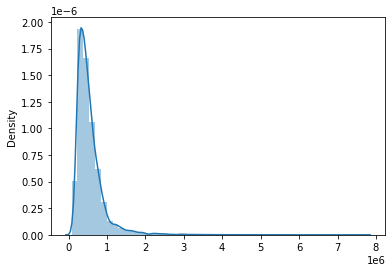

In [348]:
#Cleaning outliers in numerical values
for num_col in df2_clean.select_dtypes(np.number).columns:
    print(num_col)
    sns.distplot(x=numericals[num_col])
    plt.show()

bedrooms


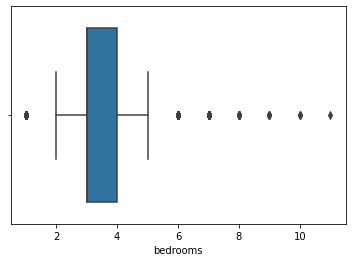

bathrooms


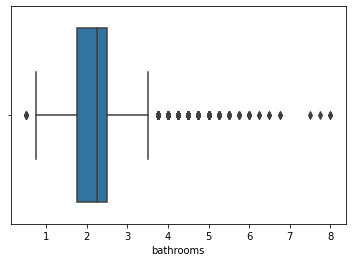

sqft_living


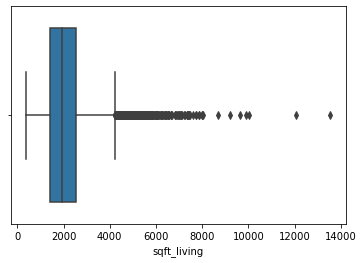

sqft_lot


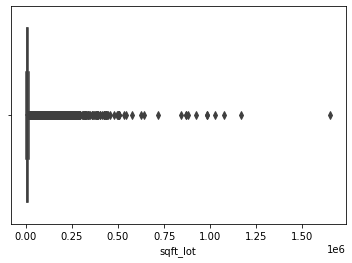

floors


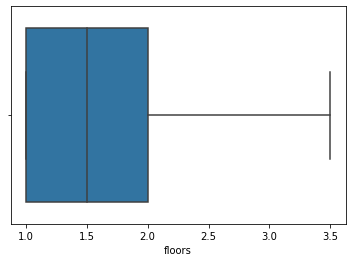

sqft_above


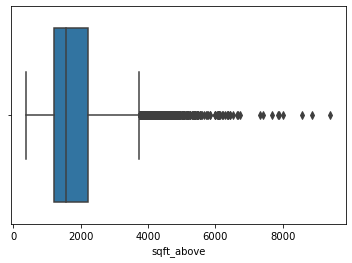

sqft_basement


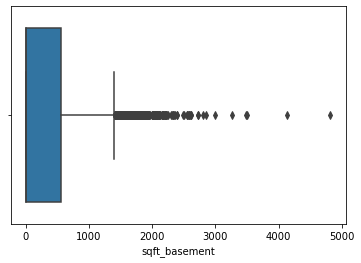

yr_built


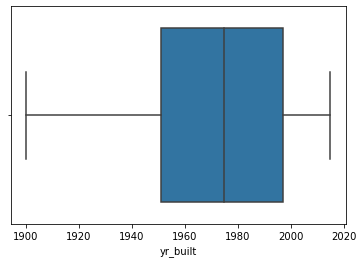

yr_renovated


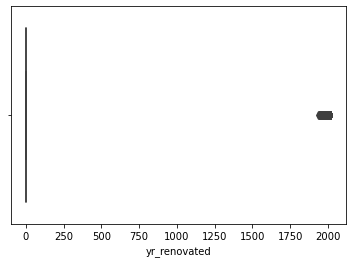

lat


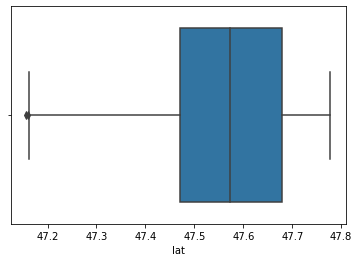

long


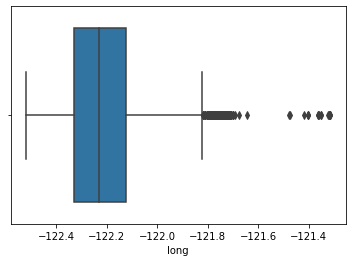

sqft_living15


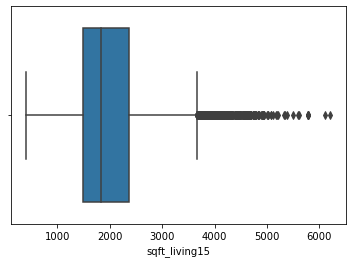

sqft_lot15


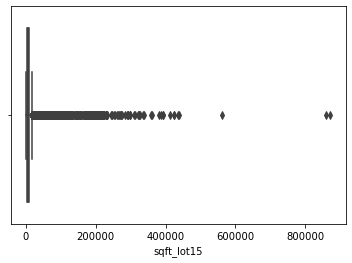

price


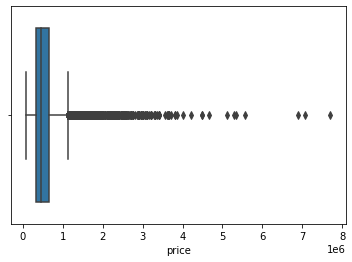

In [349]:
for num_col in df2_clean.select_dtypes(np.number).columns:
    print(num_col)
    sns.boxplot(x=numericals[num_col])
    plt.show()

In [350]:
def log_transform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [351]:
def sq_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.5

In [352]:
col_trans = df2_clean[['yr_renovated','yr_built','bathrooms','floors','bedrooms','price','sqft_living','sqft_above','sqft_basement','lat','sqft_living15','sqft_lot','sqft_lot15']]

yr_renovated


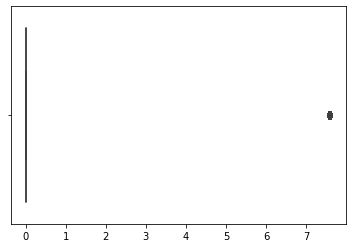

yr_built


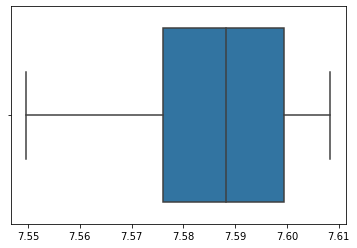

bathrooms


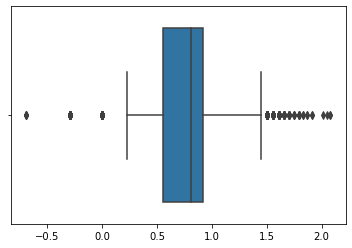

floors


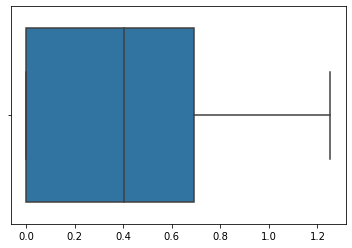

bedrooms


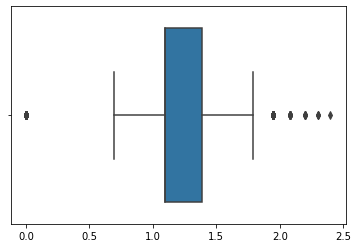

price


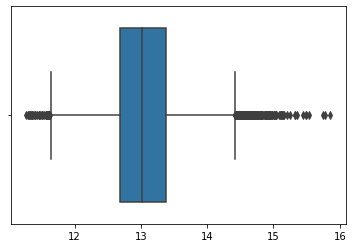

sqft_living


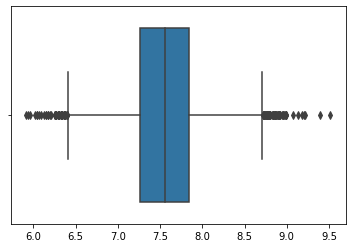

sqft_above


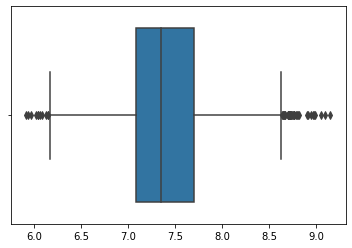

sqft_basement


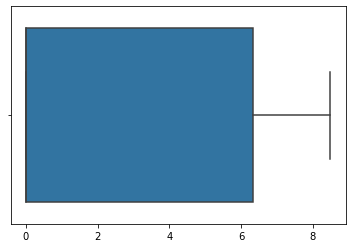

lat


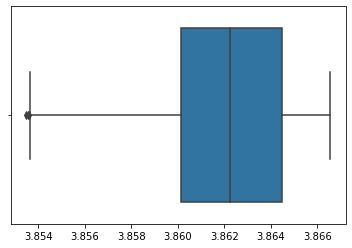

sqft_living15


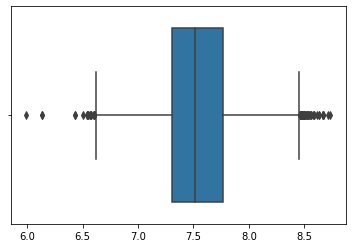

sqft_lot


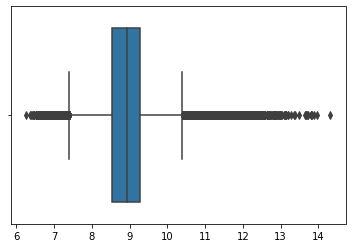

sqft_lot15


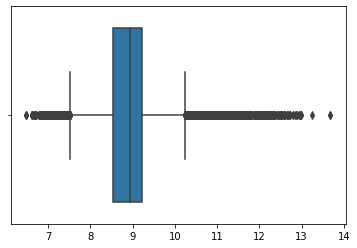

In [353]:
for col in col_trans:
    print(col)
    sns.boxplot(list(map(log_transform, col_trans[col])))
    plt.show()

yr_renovated


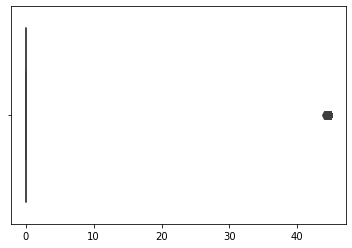

yr_built


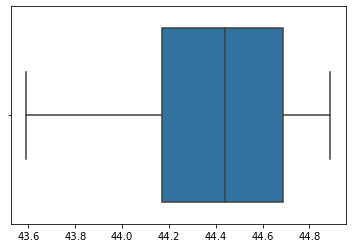

bathrooms


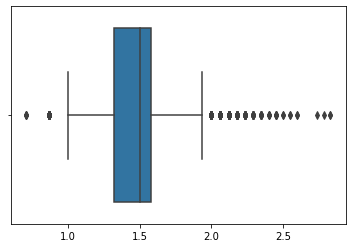

floors


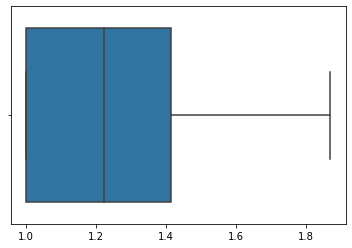

bedrooms


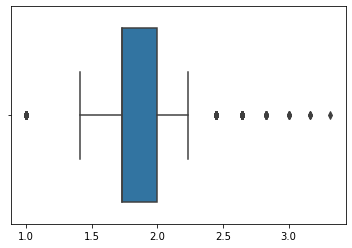

price


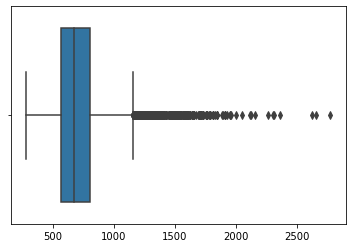

sqft_living


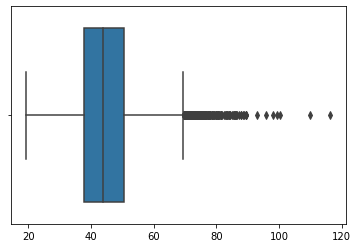

sqft_above


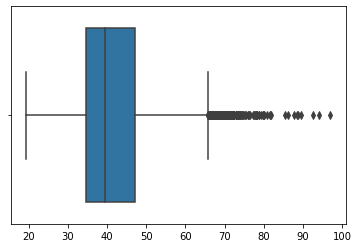

sqft_basement


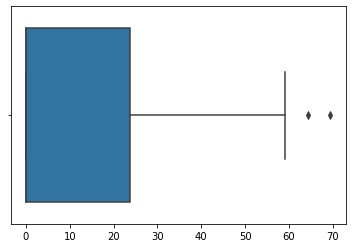

lat


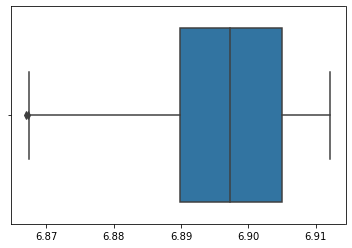

sqft_living15


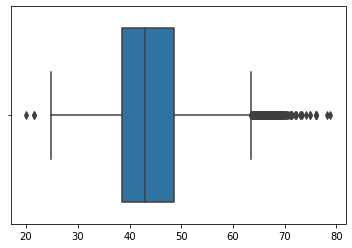

sqft_lot


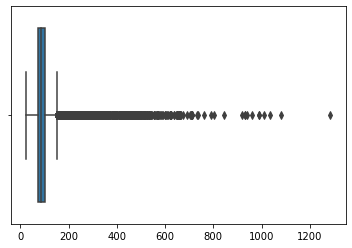

sqft_lot15


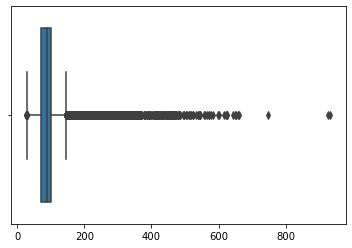

In [354]:
for col in col_trans:
    print(col)
    sns.boxplot(list(map(sq_rt_transform, col_trans[col])))
    plt.show()

<AxesSubplot:title={'center':'Correlations Between Variables'}>

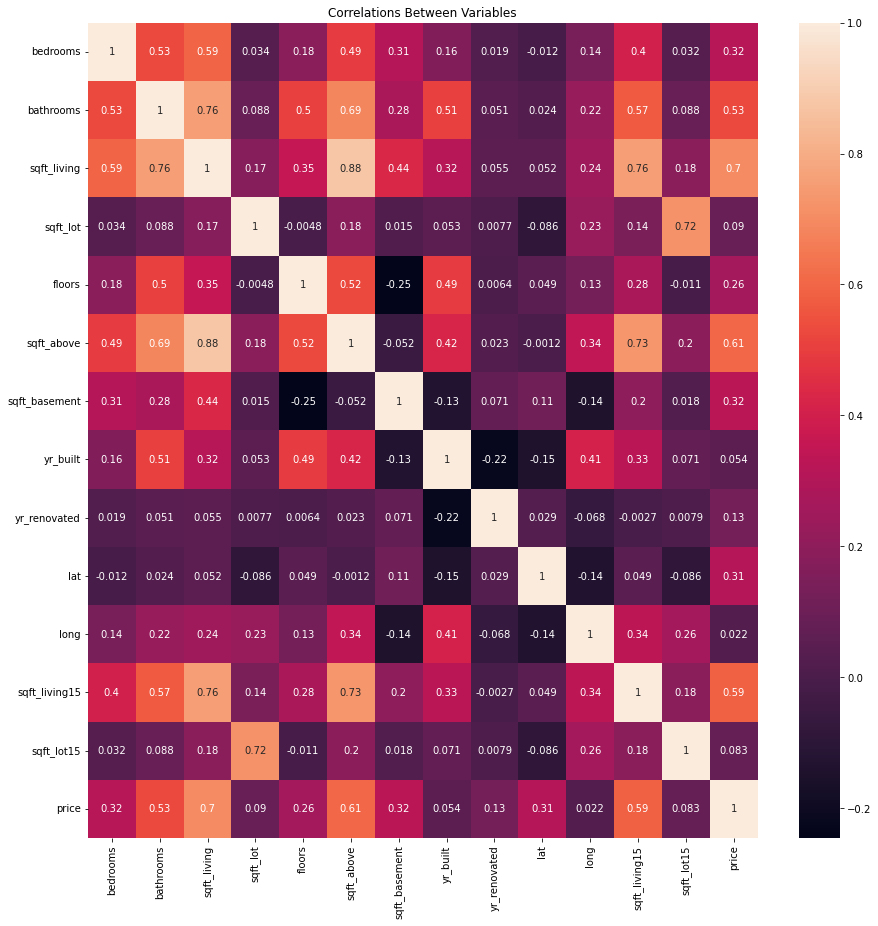

In [355]:
#Checking correlation 
corr_matrix = numericals.corr()
plt.subplots(figsize=(15,15)) 
plt.title("Correlations Between Variables")
sns.heatmap(corr_matrix, annot=True)
#sq_ft has a high corralation to price, location is positively corralated to price but not as highly correlated as overall sqftage of home.

In [356]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [357]:
variance_inflation_factor(np.array(numericals), 1)

28.920606565016882

In [358]:
for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print('VIF for column', numericals.columns[i], "=", vif)

VIF for column bedrooms = 25.388963221363746
VIF for column bathrooms = 28.920606565016882
VIF for column sqft_living = inf
VIF for column sqft_lot = 2.3608073979023634
VIF for column floors = 16.393211811083756
VIF for column sqft_above = inf
VIF for column sqft_basement = inf
VIF for column yr_built = 8250.493085651815
VIF for column yr_renovated = 1.1544270705571011
VIF for column lat = 126991.93667831791
VIF for column long = 132092.75964532173
VIF for column sqft_living15 = 24.69323504371447
VIF for column sqft_lot15 = 2.5817455612733404
VIF for column price = 8.060569270575671


Sqft_living, sqft_above and sqft_basement have an "inf" result. meaning they are highly correlated to each other and is giving a perfect infinite result. This can cause problems with the R2 score in the LR model. I will drop sqft_above and sqft_basement and rerun the LR model. I will also drop yr_renovated as it really does not have any corralation with the price and there is already a variable called sqft_living15 which has a higher corralation to the target.

In [359]:
df2_clean = df2_clean.drop(['sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15'], axis = 1)

In [360]:
df2_clean.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319,538000
2,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045,510000


In [361]:
numericals = df2_clean.select_dtypes(np.number)
categoricals = df2_clean.select_dtypes(np.object)

In [362]:
numericals

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,lat,long,price
0,3,1.00,1180,5650,1.0,1955,47.5112,-122.257,221900
1,3,2.25,2570,7242,2.0,1951,47.7210,-122.319,538000
2,2,1.00,770,10000,1.0,1933,47.7379,-122.233,180000
3,4,3.00,1960,5000,1.0,1965,47.5208,-122.393,604000
4,3,2.00,1680,8080,1.0,1987,47.6168,-122.045,510000
...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1530,1131,3.0,2009,47.6993,-122.346,360000
21592,4,2.50,2310,5813,2.0,2014,47.5107,-122.362,400000
21593,2,0.75,1020,1350,2.0,2009,47.5944,-122.299,402101
21594,3,2.50,1600,2388,2.0,2004,47.5345,-122.069,400000


In [363]:
variance_inflation_factor(np.array(numericals), 1)

27.49827689564462

In [364]:
for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print('VIF for column', numericals.columns[i], "=", vif)

VIF for column bedrooms = 25.263686558362348
VIF for column bathrooms = 27.49827689564462
VIF for column sqft_living = 25.341414952607
VIF for column sqft_lot = 1.1906947689204082
VIF for column floors = 13.062207098512525
VIF for column yr_built = 7135.868426577682
VIF for column lat = 126245.38674783893
VIF for column long = 129468.37714182687
VIF for column price = 7.858559302814332


In [365]:
final_clean = pd.concat([categoricals, numericals], axis=1)
final_clean.head()

,waterfront,view,condition,grade,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,lat,long,price
0,0,0,3,7,98178,3,1.00,1180,5650,1.0,1955,47.5112,-122.257,221900
1,0,0,3,7,98125,3,2.25,2570,7242,2.0,1951,47.7210,-122.319,538000
2,0,0,3,6,98028,2,1.00,770,10000,1.0,1933,47.7379,-122.233,180000
3,0,0,5,7,98136,4,3.00,1960,5000,1.0,1965,47.5208,-122.393,604000
4,0,0,3,8,98074,3,2.00,1680,8080,1.0,1987,47.6168,-122.045,510000


In [366]:
final_clean.shape

(21596, 14)

In [367]:
y = final_clean['price']
features = final_clean.drop(['price'], axis=1)

In [368]:
numerical_features = features.select_dtypes(np.number)
categorical_features = features.select_dtypes(np.object)

In [369]:
numerical_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,lat,long
0,3,1.00,1180,5650,1.0,1955,47.5112,-122.257
1,3,2.25,2570,7242,2.0,1951,47.7210,-122.319
2,2,1.00,770,10000,1.0,1933,47.7379,-122.233
3,4,3.00,1960,5000,1.0,1965,47.5208,-122.393
4,3,2.00,1680,8080,1.0,1987,47.6168,-122.045


In [370]:
scaled = Normalizer().fit_transform(numerical_features)
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6,7
0,0.000492,0.000164,0.193588,0.926926,0.000164,0.320733,0.007795,-0.020057
1,0.000378,0.000284,0.324111,0.913312,0.000252,0.246047,0.006018,-0.015426
2,0.000196,0.000098,0.075379,0.978951,0.000098,0.189231,0.004673,-0.011966
3,0.000699,0.000524,0.342648,0.874103,0.000175,0.343523,0.008308,-0.021397
4,0.000353,0.000236,0.197888,0.951747,0.000118,0.234050,0.005609,-0.014376


In [371]:
categorical_features.head()

,waterfront,view,condition,grade,zipcode
0,0,0,3,7,98178
1,0,0,3,7,98125
2,0,0,3,6,98028
3,0,0,5,7,98136
4,0,0,3,8,98074


In [372]:
encoder = OneHotEncoder(drop='first').fit_transform(categorical_features[['zipcode','condition', 'waterfront', 'view','grade']]).toarray()
encoded = pd.DataFrame(encoder)
encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [373]:
features_consolidated = pd.concat([scaled, encoded], axis = 1)
features_consolidated.head()

,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.000492,0.000164,0.193588,0.926926,0.000164,0.320733,0.007795,-0.020057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000378,0.000284,0.324111,0.913312,0.000252,0.246047,0.006018,-0.015426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000196,0.000098,0.075379,0.978951,0.000098,0.189231,0.004673,-0.011966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000699,0.000524,0.342648,0.874103,0.000175,0.343523,0.008308,-0.021397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000353,0.000236,0.197888,0.951747,0.000118,0.234050,0.005609,-0.014376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [374]:
x_train, x_test, y_train, y_test = train_test_split(features_consolidated, y, test_size=0.3, random_state=1)

In [375]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15117, 96)
(15117,)
(6479, 96)
(6479,)


In [376]:
#Linear regression model
lm = LinearRegression().fit(x_train, y_train)

In [377]:
lm.score(x_test, y_test)

0.8229647177490109

In [378]:
predictions = lm.predict(x_test)
predictions


array([ 261592.09283671,  627379.55469749,  775942.48483953, ...,
       1044542.07479537,  896975.43308747,  455779.6154314 ])

In [379]:
r2_score(y_test,predictions)

0.8229647177490109

In [380]:
mse = mean_squared_error(y_test, predictions)
print(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predictions)
print(mae)  

22363307675.97388
89530.0387688366


In [381]:
import math
math.sqrt(mse)

149543.664780471

In [382]:
comparison = pd.concat([pd.Series(predictions), y_test.reset_index(drop=True)], axis=1)
comparison.columns = ['predicted_price', 'real_price']
comparison.head(10)

,predicted_price,real_price
0,2.615921e+05,245000
1,6.273796e+05,607000
2,7.759425e+05,785000
3,1.207690e+06,875000
4,4.604801e+05,319950
5,6.403040e+05,565000
6,1.382770e+06,1360000
7,5.945759e+05,480000
8,4.936632e+05,600000
9,3.192433e+05,339000


In [383]:
#Decision tree model
dt= DecisionTreeRegressor().fit(x_train, y_train)

In [384]:
R2_dt = dt.score(x_test, y_test)
R2_dt

0.6593127096904975

In [385]:
predictions_dt = dt.predict(x_test)
predictions_dt

array([150000., 538000., 860000., ..., 815000., 685100., 514950.])

In [386]:
comparison_dt = pd.concat([pd.Series(predictions_dt), y_test.reset_index(drop=True)], axis=1)
comparison_dt.columns = ['predicted_price', 'real_price']
comparison_dt.head(10)

,predicted_price,real_price
0,150000.0,245000
1,538000.0,607000
2,860000.0,785000
3,1150000.0,875000
4,350000.0,319950
5,530000.0,565000
6,1420000.0,1360000
7,550000.0,480000
8,624000.0,600000
9,172500.0,339000


In [387]:
RMSE_dt = mean_squared_error(y_true=y_test, y_pred=predictions_dt, squared=False)
MAE_dt = mean_absolute_error(y_true=y_test, y_pred=predictions_dt)

In [388]:
print('R2 =', R2_dt)
print('RMSE =', RMSE_dt)
print('MAE =', MAE_dt)

R2 = 0.6593127096904975
RMSE = 207451.25745223914
MAE = 119033.75860472296


In [391]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train) 

KNeighborsRegressor(n_neighbors=10)

In [392]:
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.7751567788406417


In [393]:
predictions

array([ 242190. ,  577718.8,  718560. , ...,  890200. , 1107400. ,
        445800. ])

In [394]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
# predictions  = lm.predict(X_test)
r2_score=r2_score(y_test, predictions)
r2_score

0.7751567788406417

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,1000,2):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,1000,2),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')